In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn.datasets import load_iris

# Train-test split
from sklearn.model_selection import train_test_split

# DIFFERENT ML MODELS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Settings
%matplotlib inline
sns.set_style('whitegrid')

print("✅ All libraries imported!")

✅ All libraries imported!


In [2]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"✅ Data ready!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

✅ Data ready!
Training samples: 120
Testing samples: 30


In [3]:
# Dictionary of different models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Naive Bayes': GaussianNB()
}

print("🤖 MODELS CREATED:")
print("="*50)
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")
print("="*50)

🤖 MODELS CREATED:
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. K-Nearest Neighbors
5. Support Vector Machine
6. Naive Bayes


In [5]:
# Store results
results = {}
predictions = {}

print("\n🚀 TRAINING ALL MODELS...")
print("="*60)

for name, model in models.items():
    print(f"\n⚙️  Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"   ✅ Accuracy: {accuracy * 100:.2f}%")

print("\n" + "="*60)
print("✅ ALL MODELS TRAINED!")


🚀 TRAINING ALL MODELS...

⚙️  Training Decision Tree...
   ✅ Accuracy: 93.33%

⚙️  Training Random Forest...
   ✅ Accuracy: 90.00%

⚙️  Training Logistic Regression...
   ✅ Accuracy: 96.67%

⚙️  Training K-Nearest Neighbors...
   ✅ Accuracy: 100.00%

⚙️  Training Support Vector Machine...
   ✅ Accuracy: 96.67%

⚙️  Training Naive Bayes...
   ✅ Accuracy: 96.67%

✅ ALL MODELS TRAINED!


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_200\523805461.py:30: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
d:\ml-learning-journey\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


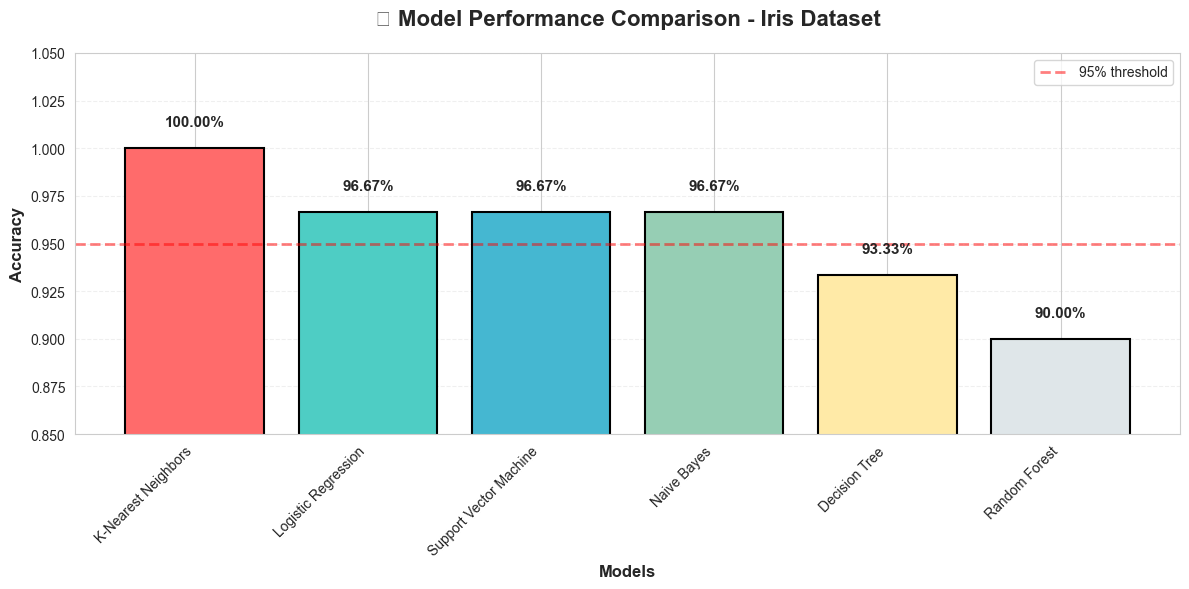


📊 Visual comparison complete!


In [6]:
# Create a beautiful comparison chart
plt.figure(figsize=(12, 6))

# Sort results by accuracy
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

# Create bar plot
bars = plt.bar(sorted_results.keys(), sorted_results.values(), 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DFE6E9'],
               edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (model, accuracy) in enumerate(sorted_results.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy*100:.2f}%', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

# Formatting
plt.title('🏆 Model Performance Comparison - Iris Dataset', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylim(0.85, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add a line at 95% accuracy
plt.axhline(y=0.95, color='red', linestyle='--', linewidth=2, alpha=0.5, label='95% threshold')
plt.legend()

plt.tight_layout()
plt.show()

print("\n📊 Visual comparison complete!")

In [7]:
# Create a detailed results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [f"{acc*100:.2f}%" for acc in results.values()],
    'Accuracy_Score': list(results.values())
}).sort_values('Accuracy_Score', ascending=False).reset_index(drop=True)

results_df['Rank'] = range(1, len(results_df) + 1)
results_df = results_df[['Rank', 'Model', 'Accuracy']]

print("\n🏆 FINAL RANKINGS:")
print("="*60)
print(results_df.to_string(index=False))
print("="*60)

# Find best model
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print(f"\n🥇 WINNER: {best_model_name}")
print(f"   Best Accuracy: {best_accuracy * 100:.2f}%")


🏆 FINAL RANKINGS:
 Rank                  Model Accuracy
    1    K-Nearest Neighbors  100.00%
    2    Logistic Regression   96.67%
    3 Support Vector Machine   96.67%
    4            Naive Bayes   96.67%
    5          Decision Tree   93.33%
    6          Random Forest   90.00%

🥇 WINNER: K-Nearest Neighbors
   Best Accuracy: 100.00%


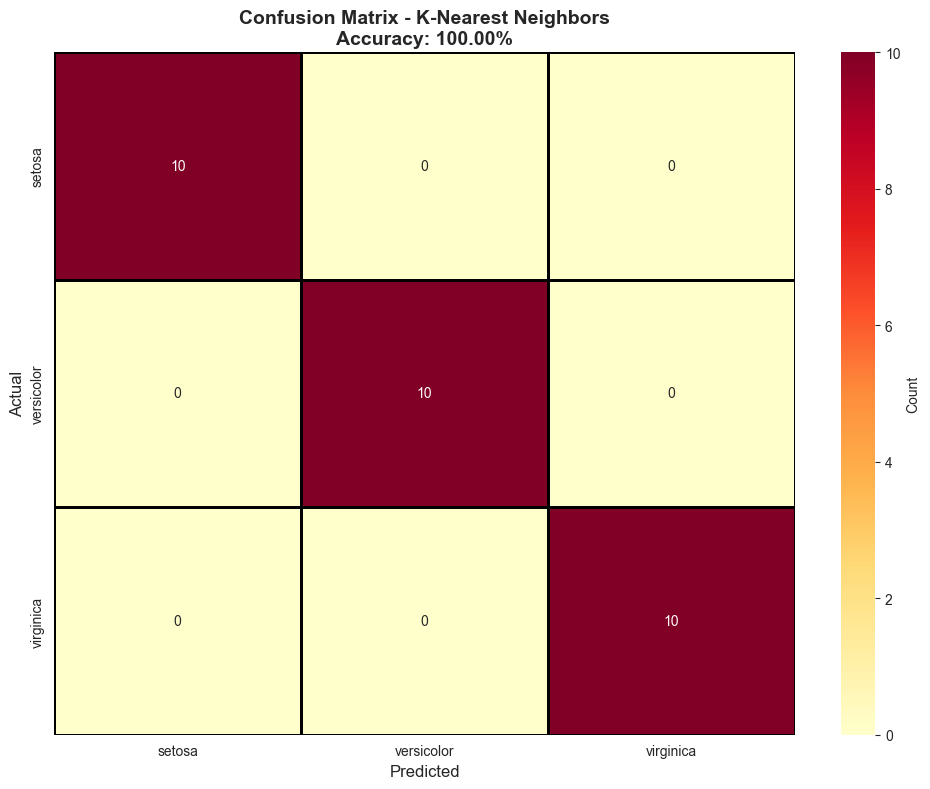

✅ Best model confusion matrix visualized!


In [8]:
# Get best model's predictions
best_predictions = predictions[best_model_name]

# Create confusion matrix
cm = confusion_matrix(y_test, best_predictions)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'},
            linewidths=1, linecolor='black')

plt.title(f'Confusion Matrix - {best_model_name}\nAccuracy: {best_accuracy*100:.2f}%', 
          fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print(f"✅ Best model confusion matrix visualized!")

In [9]:
print("\n📋 DETAILED CLASSIFICATION REPORT")
print(f"Model: {best_model_name}")
print("="*70)
print(classification_report(y_test, best_predictions, 
                           target_names=iris.target_names))


📋 DETAILED CLASSIFICATION REPORT
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate multiple metrics for all models
detailed_results = []

for name, model in models.items():
    y_pred = predictions[name]
    
    detailed_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })

# Create DataFrame
comparison_df = pd.DataFrame(detailed_results)
comparison_df = comparison_df.round(4).sort_values('Accuracy', ascending=False)

print("\n📊 COMPREHENSIVE MODEL COMPARISON:")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


📊 COMPREHENSIVE MODEL COMPARISON:
                 Model  Accuracy  Precision  Recall  F1-Score
   K-Nearest Neighbors    1.0000     1.0000  1.0000    1.0000
   Logistic Regression    0.9667     0.9697  0.9667    0.9666
Support Vector Machine    0.9667     0.9697  0.9667    0.9666
           Naive Bayes    0.9667     0.9697  0.9667    0.9666
         Decision Tree    0.9333     0.9333  0.9333    0.9333
         Random Forest    0.9000     0.9024  0.9000    0.8997


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_200\3387250943.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\ml-learning-journey\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


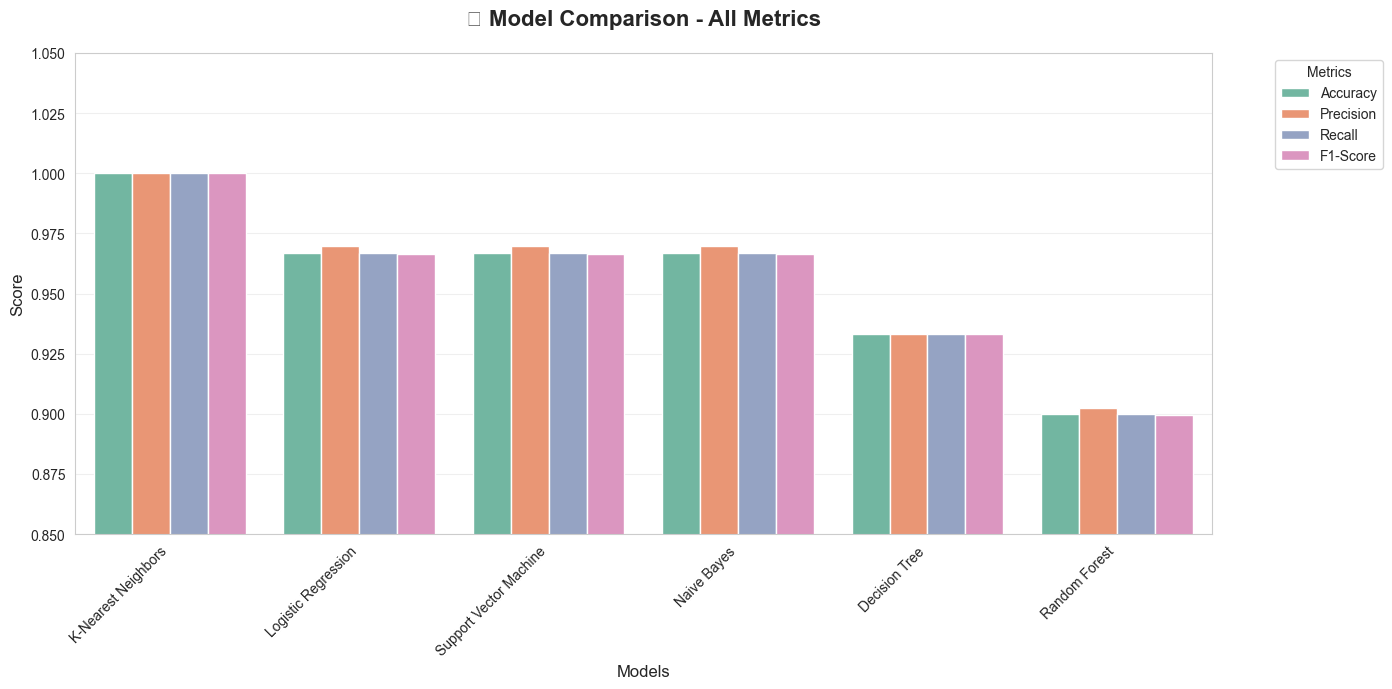

✅ All metrics visualized!


In [11]:
# Melt the dataframe for easier plotting
comparison_melted = comparison_df.melt(id_vars='Model', 
                                        var_name='Metric', 
                                        value_name='Score')

# Create grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=comparison_melted, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('📊 Model Comparison - All Metrics', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.85, 1.05)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ All metrics visualized!")

In [12]:
print("\n🎓 KEY TAKEAWAYS:")
print("="*70)

takeaways = {
    "1. Multiple Models": "Always try multiple algorithms - each has strengths",
    "2. No Universal Best": "Best model depends on data and problem",
    "3. Quick Comparison": "Scikit-learn makes it easy to try many models",
    "4. Metrics Matter": "Accuracy alone isn't enough - check precision, recall",
    "5. Visualization Helps": "Charts make comparison intuitive",
    "6. Simple Can Win": "Sometimes simpler models perform as well as complex ones"
}

for key, value in takeaways.items():
    print(f"\n{key}: {value}")

print("\n" + "="*70)


🎓 KEY TAKEAWAYS:

1. Multiple Models: Always try multiple algorithms - each has strengths

2. No Universal Best: Best model depends on data and problem

3. Quick Comparison: Scikit-learn makes it easy to try many models

4. Metrics Matter: Accuracy alone isn't enough - check precision, recall

5. Visualization Helps: Charts make comparison intuitive

6. Simple Can Win: Sometimes simpler models perform as well as complex ones



In [13]:
# avalable models

# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

# 3. Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# 4. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

# 5. Support Vector Machine
from sklearn.svm import SVC
model = SVC()

# 6. Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# 7. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

# 8. XGBoost (install first: pip install xgboost)
from xgboost import XGBClassifier
model = XGBClassifier()